# W266 - Headline Project

### Load first training file and explore content

In [2]:
import os
import csv
from NYT_parser import NYTArticle
from utilities import *

train_paths = data_setup.get_paths('train')
article = NYTArticle.from_file(os.path.join('data','nyt', train_paths[0][0]))

In [ ]:
# how does this differ from the headline??
article.title

In [ ]:
# document ID (filename)
article.docid

In [ ]:
# date in a datetime format
article.date

In [ ]:
# summary -- few docs seem to have?
article.summary

In [ ]:
# dateline -- location (city, state) and pub date
article.dateline

In [ ]:
# headline that ran in the print edition
article.print_hede

In [ ]:
# headline that ran on the website version
article.online_hede

In [ ]:
# opening paragraph
article.lede

In [ ]:
# topic tags
article.descriptors

In [ ]:
# more extensive tags?
article.general_descriptors

In [ ]:
# more extensive tags?
article.types_of_material

In [ ]:
article.wordcount

In [ ]:
# section of the print newspaper
article.section

In [ ]:
# body text but also includes subhead, book title data, endbyline, section title -- all kinds of stuff
article.paragraphs

### Load all training files and explore training set

In [4]:
# paths = data_setup.get_paths()    

# show 50 article headlines
for path in train_paths[:50]:
    article = NYTArticle.from_file(os.path.join('data','nyt',path[0]))
    print(article.print_hede)

["The President's Address: 'We Heard America Shouting'"]
["A Killer, Yes, but She's a Good Old Girl"]
["How High's The Bidding, Mama?"]
['Pacificorp reports earnings for Qtr to Sept 30']
['Stewart Set to Return']
['Taxing Online Sales']
["Jones Ducks King's Delivery and Lands His Punches"]
['The Religious Right Readies Agenda for Second 100 Days']
['9/11 Widows Skillfully Applied The Power of a Question: Why?']
['EXECUTIVES']
['Palestinian Chief Threatens to Quit Over Rival Fatah Slate']
['Paid Notice: Memorials  SPINA, PHILIP']
['Kurds in Iraq']
['MOVIES']
['Anthrax Vaccination Program Is Further Cut by the Pentagon']
["King's Apartments Open"]
['NEWS SUMMARY: TUESDAY, SEPTEMBER 15, 1987']
['The Voice of Greenwich Packs Up His Smith-Corona']
['Scholarly Call For Unclouded View Of the Holocaust']
["New York's School System in Crisis"]
['Four Named To Hall of Fame']
['BRIEFS']
['Unexpected Visitor']
['Art in Review']
['Heat and Pollution Equal Death']
['Democrats See Gold in Environment

#### Explore word counts

labor 153
music 301
strikes 34
hockey, ice 77
playoff games 41
documentary films and programs 16
public television 2
united states armament and defense 234
finances 265
income 6
tuition 10
basketball 176
company reports 376
budgets and budgeting 132
election issues 77
presidential election of 2004 30
presidential elections (us) 11
beta carotene 2
children and youth 187
genetic engineering 13
grain 12
inventions and patents 9
rice 2
vitamins 3
new models, design and products 36
sporting goods 3
tennis 36
news and news media 71
cooking and cookbooks 57
directories 1
food 67
organic food 1
pizza pies 2
restaurants 97
vegetarianism 2
vendors, street 7
ethics 183
united states politics and government 105
automobiles 77
bureaucratic red tape 2
child abuse 15
licenses 4
marriages 10
property taxes 14
public opinion 50
robberies and thefts 39
security and warning systems 27
states (us) 27
taxation 97
drugs (pharmaceuticals) 38
mental health and disorders 44
books and literature 228
reviews 482

models (simulations) 1
virtual reality (computers) 2
dietary supplements and herbal remedies 1
retirement communities and assisted living 2
muscles 2
industrial espionage and piracy 1
bouillabaisse 1
air traffic control 3
leisure 1
karate 2
martial arts 2
meditation 1
seido 1
autographs 1
holland tunnel 1
ducks 1
law andlegislation 1
landfill 1
apollo project 1
moon 1
tomatoes 1
chemistry 2
burlesque 1
cd-rom (compact disk-read only memory) 2
lost and found property 1
presidential election of 1980 1
kidneys 4
dairy products 2
import quotas 1
political action committees 2
grapefruit 2
health foods 1
twins 1
silicone 2
bayreuth wagner festival 1
consumer credit 2
usury laws (us state) 1
buildings (structures) 6
terra cotta 1
crop controls and subsidies 1
loudspeakers 1
transition between administrations 1
chairs 3
rocking chairs 1
buddhism 2
bupropion (drug) 1
nerves and nervous system 1
neuropathy 1
solvents 1
leaders and leadership 1
pacemakers 1
staphylococcus aureus 1
scud (missile) 

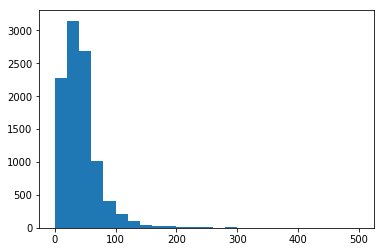

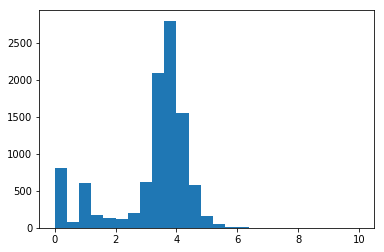

In [7]:
# Sample 10,000 random articles for analysis (entire data set is too large)
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(10)

word_counts = []
category_counts = {}
for path in random.sample(train_paths, 10000):
    try:
        article = NYTArticle.from_file(os.path.join('data','nyt',path[0]))
#         word_counts.append(int(article.wordcount)) # word counts for full text
        word_counts.append(int(len(article.lede[0].split(' ')))) # word counts for lede
        for category in article.descriptors:
            if category in category_counts.keys():
                category_counts[category] += 1
            else:
                category_counts[category] = 1
    except:
        # need to figure out why these are throwing an exception
#         print(path)
        word_counts.append(1)

# excluding some outliers from plotting window
plt.hist(word_counts, bins=25, range=(0, 500))

plt.figure()
plt.hist(np.log(word_counts), bins=25, range=(0, 10))

# print(max(word_counts))
# print(min(word_counts))

for key, value in category_counts.items():
    print(key, value)

# for a given article length threshold, how many words would we be throwing out?
# print(len(word_counts>1500))

In [4]:
# paths = data_setup.get_paths()    
# confirm filter works by showing articles that were filtered out
num_filtered_out = 0
for path in train_paths[:20000]:
    article = NYTArticle.from_file(os.path.join('data',path[0]))
    if article.pass_filters() == False:
        num_filtered_out += 1
        print(article.print_hede, article.wordcount, article.descriptors)

["The President's Address: 'We Heard America Shouting'"] 8630 ['biographical information', 'law and legislation', 'state of the union message (us)', 'united states politics and government']
['EXECUTIVES'] 212 ['appointments and executive changes']
['Paid Notice: Memorials  SPINA, PHILIP'] 18 []
['MOVIES'] 122 ['terms not available']
['BRIEFS'] 272 ['no index terms']
['Unexpected Visitor'] 0 ['birds', 'herons']
['Correction'] 60 ['correction stories', 'housing']
['The Answers'] 377 ['no index terms']
['Key Rates'] 363 ['key rates (nyt column)']
['Anxious Employees'] 134 ['airlines and airplanes', 'hijacking', 'labor', 'suits and litigation', 'terrorism', 'working at home', 'world trade center (nyc)']
['TRANSACTIONS'] 371 []
['Aspen'] 1953 ['skiing', 'travel and vacations']
['CHICAGO'] 429 ['travel and vacations']
['Corrections'] 98 ['correction stories']
['Gone.com'] 3126 ['bankruptcies', 'computers and the internet', 'labor', 'layoffs and job reductions', 'relocation of business']
['Ke

['A Little Bit of Everything (Except for Superheroes)'] 5800 ['motion pictures', 'reviews']
['Economic Calendar'] 147 []
['The Brodeur Of Old Leads The Devils'] 0 []
['THE BUDDY SYSTEM'] 11 ['apparel', 'children and youth']
['CHRONICLE'] 133 ['awards, decorations and honors', 'books and literature']
['Corrections'] 49 ['appointments and executive changes', 'correction stories']
['Key Rates'] 78 []
['Corrections'] 111 ['airlines and airplanes', 'correction stories', 'hijacking', 'mental health and disorders', 'terrorism', 'world trade center (nyc)']
['Corrections'] 123 []
['In Mexico, Facing a Wall'] 0 ['illegal aliens', 'immigration and refugees']
["The 1990 Elections: New Jersey - A Governor's Response New Math on Both Sides of the Hudson; Hearing Tax Outcry in New Jersey Vote, Florio Says He'll Consider New Course"] 1039 ['education and schools', 'election issues', 'election results', 'elections', 'state and local aid (us)', 'taxation']
['Corrections'] 100 []
['BUSINESS DIGEST'] 547 

['Correction'] 88 ['correction stories', 'ethics', 'united states politics and government']
['INSIDE'] 158 []
['Corrections'] 191 []
['People'] 177 ['appointments and executive changes']
['Corrections'] 54 ['correction stories', 'politics and government']
['NEWS SUMMARY'] 1202 []
['BUSINESS DIGEST'] 608 ['no index terms']
['Many See Hope In Drug Pulled During Testing'] 2313 ['drugs (pharmaceuticals)', 'gdnf (drug)', 'medicine and health', "parkinson's disease", 'tests and testing']
['Birth of a Candidate: Al Gore Goes Into the Family Business'] 4464 ['biographical information', 'elections', 'presidential election of 2000']
['OTHER HIGHLIGHTS'] 269 ['election results', 'elections']
['Question Box'] 782 ['athletics and sports']
['DANCE'] 272 ['dancing', 'reviews']
['Country Gothic'] 337 ['architecture']
['Corrections'] 65 ['correction stories', 'restaurant reviews']
["Trump's Riverside Development Is Close to Reality"] 0 ['area planning and renewal', 'riverside south project (nyc)']
['St

['FAMILY FARE'] 914 ['aquariums', 'children and youth', 'culture', 'parks and other recreation areas', 'theater']
['THE WORLD: Ordeal in Niger; A New Face of Hunger, Without the Old Excuses'] 1203 ['food', 'foreign aid']
["For Bullet's Victim, a Vigil Triumphs; Against Medical Odds, Yeshiva Student Emerges From Coma"] 1575 ['hasidism', 'murders and attempted murders', 'shootings']
['ARTS BRIEFING'] 1707 ['art', 'art basel miami beach (art show)', 'opera']
['WEEKENDER GUIDE'] 901 ['entertainment and amusements']
['INSIDE'] 172 ['no index terms']
['JAVA JIVE'] 103 ['coffee', 'english language']
['Escape From Suburbia; Community Associations Thrive Amid Debate on Freedom, Privacy and Democracy'] 2139 ['housing', 'suburbs']
['Welcome To the Club: Jazz Swings In New Spots'] 3043 ['jazz', 'music', 'nightclubs and cabarets']
["Facing the Philharmonic, Armed With New CD's"] 2222 ['classical music', 'music', 'recordings (audio)']
['For Children'] 499 ['no index terms']
['Leaders of NATO Reject 

['Corrections'] 75 ['cemeteries', 'correction stories']
['Black & Decker Corp.(BDK,N) reports earnings for Qtr to Oct 2'] 78 ['company earnings']
['WHEN WOMEN FINALLY GOT THE WORD'] 2592 ['books and literature', 'women']
['COMPANY NEWS'] 1320 []
['Heavy Metal'] 795 ['academy awards (oscars)', 'books and literature', 'jewels and jewelry', 'motion pictures', 'pornography and obscenity', 'reviews']
['CORRECTION'] 27 ['correction stories', 'nazi era', 'war crimes and criminals']
['Buy a G.M. Car at 0% Now, Get the Same Deal in 5 Years'] 491 ['automobiles', 'credit', 'interest rates']
['Poor Landlords'] 687 ['housing', 'rent control and stabilization']
['Corrections'] 92 []
['Angered G.O.P. Chief Says the TV Networks Refuse to Sell Time for Health Care Ads'] 811 ['advertising', 'health insurance', 'medicine and health', 'reform and reorganization', 'stations and networks', 'television']
['Chronicle'] 54 ['apparel', 'shows (exhibits)']
['People'] 343 ['appointments and executive changes']
['

['Key Rates'] 363 ['key rates (nyt column)']
['Whiten Sidelined'] 62 ['baseball', 'health, personal']
['Corrections'] 47 ['correction stories', 'travel and vacations', 'weaving']
["Architects' Proposals May Be Bold, But They Probably Won't Be Built"] 2036 ['airlines and airplanes', 'buildings (structures)', 'hijacking', 'monuments and memorials', 'office buildings and commercial properties', 'roads and traffic', 'streets', 'terrorism', 'world trade center (nyc)']
['People'] 212 ['appointments and executive changes']
['THREATS AND RESPONSES: Excerpts From Reports by Congressional Inquiry Into Sept. 11 Attacks; Conclusions of the Majority Report'] 622 ['airlines and airplanes', 'hijacking', 'terrorism', 'world trade center (nyc)']
['Corrections'] 40 ['correction stories']
['Corrections'] 102 ['bombs and explosives', 'capital punishment', 'correction stories', 'terrorism']
['STATE OF THE UNION: The Scene; Looking for Rhapsody? Try a Different Address'] 1145 ['law and legislation', 'state 

['Corrections'] 56 ['colleges and universities', 'correction stories', 'firearms', 'gun control', 'murders and attempted murders']
['Reggie Workman'] 42 ['concerts and recitals', 'music']
['CLASSICAL MUSIC AND DANCE GUIDE'] 6334 ['dancing', 'music']
['METRO BRIEFING'] 1031 []
['Big Latin Debtors Find That Lacking Austerity, Relief Is Not Coming Soon'] 2694 ['credit', 'economic conditions and trends', 'finances', 'reform and reorganization', 'surveys and series', 'third world and developing countries']
['Paid Notice: Memorials  LIEDER, WILLIAM A., COL.'] 16 []
['On Demand'] 0 ['motion pictures']
['Corrections'] 101 ['awards, decorations and honors', 'correction stories', 'grammy awards', 'music']
['EXECUTIVE CHANGES'] 297 ['appointments and executive changes']
['Corrections'] 31 ['bill of rights (us)', 'correction stories', 'law and legislation']
['ECONOMIC PULSE: The Northeast; Growing Health Care Economy Gives Northeast a Needed Boost'] 2729 ['biotechnology', 'drugs (pharmaceuticals)'

['Maxicare Health Plans Inc.(MAXI,NNM) reports earnings for 2d qtr to Jun 30'] 98 ['company earnings\n<p>']
['Corrections'] 98 ['colombia-international relations-us', 'correction stories', 'drug abuse and traffic', 'united states international relations']
['LJUBLJANA'] 354 ['travel and vacations']
['Paid Notice: Memorials  AUDITORE, STEPHEN'] 16 []
['WISCONSIN'] 293 ['election results', 'elections', 'governors (us)', 'united states politics and government']
['Where Is Optimism in Germany? Among the Bedraggled Easterners'] 2454 ['economic conditions and trends', 'germany, reunification of', 'politics and government', 'reform and reorganization', 'social conditions and trends', 'surveys and series']
['Corrections'] 58 ['correction stories', 'halls of fame', 'music']
['Robert Gober'] 675 ['art', 'reviews']
['Key Rates'] 94 []
['CURRENCY'] 60 ['no index terms']
['Republican Psychodrama'] 390 ['biographical information', 'editorials', 'elections']
['RESULTS PLUS'] 758 ['no index terms']
['C

['Attempt to Reclaim Sacred Books Erupts Into a Brawl in Moscow'] 0 ['hasidism', 'soviet jews']
['Results Plus'] 512 ['no index terms']
['Evangelizing Among Their Fellow Students'] 0 ['christians and christianity', 'education and schools', 'prayers and prayer books']
["Election Win Seems Assured for Guinean Leader, but His Nation's Fate Is Far From Certain"] 661 ["coups d'etat and attempted coups d'etat", 'election results', 'elections', 'politics and government']
['Bridge'] 236 ['bridge (card game)']
['Five Boroughs and Thousands of Stories'] 4529 []
['Corrections'] 115 ['accounting and accountants', 'correction stories']
['Rebellious Troops'] 188 ['united states armament and defense', 'united states international relations']
['Home Improvement'] 878 ['home repairs']
['CALENDAR'] 418 []
['Dividend Meetings'] 101 ['dividends', 'stocks and bonds']
['In Accord, N.Y., There Is Anything But; Clash of Workers and Weekenders Includes Suits and Death Threats'] 1697 []
['F.Y.I.'] 637 ['alcohol

['Wine Talk'] 1062 ['alcoholic beverages', 'caviar', 'champagne']
['Advertising; Accounts'] 12 ['advertising', 'newspapers']
["PHOTOGRAPHER'S JOURNAL"] 0 []
['Key Rates'] 97 ['key rates (nyt column)']
['News Summary'] 1062 []
['Metro Briefing | New York: Manhattan: Mayor Is Not Expecting Change In Antiterror Aid'] 146 ['budgets and budgeting', 'finances', 'terrorism']
["A Guru's Journey -- A special report.; The Seer Among the Blind: Japanese Sect Leader's Rise"] 2702 ['poison gases', 'religious cults', 'sarin (nerve\ngas)', 'subways', 'terrorism', 'transit systems']
['Calendar'] 378 []
["Cordoba's Hymn to Islam"] 3241 ['travel and vacations']
['Footlights'] 748 ['art', 'children and youth', 'culture', 'jews', 'theater']
['NEWS SUMMARY'] 1143 []
['Bridge'] 331 ['bridge (card game)']
['Bridge'] 271 ['bridge (card game)']
['Fortress America'] 104 ['security and warning systems', 'terrorism']
['RACKETEERING INDICTMENTS'] 94 []
['The Modern Prepares for the 21st Century'] 2118 []
['3 Worke

["Is It for Students' Edification or for Their Comfort?"] 0 ['art']
['Legalizing Immigrants'] 158 ['illegal aliens', 'immigration and refugees', 'labor']
['Corrections'] 101 ['correction stories', 'united states economy']
['Visionaries Who Observe Reality From the Outside In'] 2056 ['art', 'outsider art fair', 'reviews']
['PUBLIC LIVES'] 711 ['awards, decorations and honors', 'music', 'television']
['Life, He Thought, Meant Waiting for One Bad Thing'] 2447 ['theater']
['No Headline'] 35 ['quotation of the day']
['Running Scared'] 339 ['editorials', 'running']
['Fighting City Hall'] 2163 ['books and literature', 'politics and government']
['Corrections'] 53 ['correction stories', 'foundations', 'law and legislation', 'philanthropy', 'taxation']
['Corrections'] 381 ['correction stories', 'economic conditions and trends', 'public opinion']
["A Message to Web Designers: If It Ain't Broke, Don't Fix It"] 1291 ['computers and the internet']
['CHRONICLE'] 321 ['biographical information', 'har

['Somewhere Out There, a Big One Is About to Get Away'] 0 ['fish and other marine life', 'fishing, sport']
['Prosecutor Reprimanded'] 147 ['drug abuse and traffic', 'ethics']
['INSIDE'] 87 ['terms not available']
['Miscellany'] 107 ['automobiles', 'cellular telephones']
['Second-Generation Renovation'] 1410 ['biographical information', 'golf']
['OBSERVATORY'] 704 ['comet hale-bopp', 'comets', 'flowers and plants', 'galileo (spacecraft)', 'jupiter (planet)', 'leaves', 'space']
['Corrections'] 33 ['correction stories', 'taxation']
["TOMORROW'S FACTORY: THE GLOBAL ENGINE MANUFACTURING ALLIANCE"] 2 ['automation', 'automobiles', 'factories and industrial plants', 'labor', 'production', 'productivity']
['CALENDAR'] 2601 []
['Not in My Front Yard'] 2838 ['buildings (structures)', 'design', 'housing', 'real estate']
['No Headline'] 670 ['discrimination', 'homosexuality', 'military personnel', 'reform and reorganization', 'united states armament and defense']
['60-MINUTE GOURMET'] 606 ['cooking

['COMPANY BRIEFS'] 203 ['no index terms']
['RESIDENTIAL RESALES'] 624 ['housing', 'sales']
['Homeland Security'] 176 ['airlines and airplanes', 'editorials', 'hijacking', 'terrorism', 'world trade center (nyc)']
['Island Plan Is Stalled'] 0 []
['People'] 78 ['appointments and executive changes']
['Deja Vu All Over Again'] 0 ['baseball']
['CHRONICLE'] 123 ['wills and estates']
['Corrections'] 42 ['correction stories', 'global warming', 'hurricanes and tropical storms', 'weather']
['The View From/New Haven; A Physicist at Yale Is Helping Baseball Umpires Make the Call'] 1220 ['baseball', 'books and literature', 'umpires']
['Beliefs'] 817 ['christians and christianity', 'homosexuality', 'news and news media', 'religion and churches']
['METRO DIGEST'] 853 ['no index terms']
['BENEFITS'] 656 []
['Accounts'] 28 ['account changes', 'advertising', 'marketing and merchandising', 'skiing']
['Tunisian Couscous'] 111 ['cooking and cookbooks']
['For Richer'] 114 ['united states economy']
['TRANSACT

['Wanderlust for a Cozy New York Hotel Bar'] 2589 ['bars', 'hotels and motels']
['NEWS SUMMARY'] 844 ['no index terms']
['North Beach Journal; The Nightclub Where It All Began Imposes an End on a Topless Era'] 752 ['nightclubs and cabarets']
['Corrections'] 66 ['correction stories', 'food']
["After the Portobello, It's Mushroom Mania"] 2444 ['farmers', 'mushrooms']
['Corrections'] 62 []
['Cornwall'] 284 ['nytravel', 'travel and vacations']
['BUSINESS DIGEST'] 567 []
['BUSINESS DIGEST'] 1108 []
['Caller ID'] 298 ['identification devices', 'new models, design and products', 'privacy, right of', 'telephones']
['RESULTS PLUS'] 449 ['no index terms']
['Bridge'] 333 ['bridge (card game)']
['NEWS SUMMARY'] 1011 ['no index terms']
['Hawaiian Electric Industries (HE,N) reports earnings for 3d qtr to Sept 30'] 42 ['company earnings']
['Data Update'] 184 ['housing', 'mortgages', 'prices', 'sales']
['CHRONICLE'] 145 []
['Accounts'] 94 ['account changes']
['INSIDE'] 140 ['no index terms']
['F.Y.I.'

['Corrections'] 140 ['correction stories', 'restaurants']
['RESULTS PLUS'] 963 ['no index terms']
['CONFLICT IN THE BALKANS: The Serbs; Belgrade Vows to Cut Bosnia Aid, Prompting Skepticism and Hope'] 1452 ['civil war and guerrilla warfare', 'embargoes', 'international relations']
['Panama Fighters Continue Their Trek Home'] 0 ['united states armament and defense']
['Upheaval in the East;   Ethnic Albanians Honor a Victim of Violence in Yugoslavia'] 0 ['minorities (ethnic, racial, religious)']
['PRESSURING PERDUE'] 86 ['animals']
["Faster than you can say 'new generation,' Ted Sann is out at BBDO."] 1198 ['advertising', 'appointments and executive changes', 'biographical information', 'executives and management', 'suspensions, dismissals and resignations']
['RESULTS PLUS'] 345 ['no index terms']
['Backtalk: First Vermont, Then the World; City Champs Provide the Hope for U.S. Soccer'] 1934 ['interscholastic athletics', 'soccer']
['K2 Design branches out into the risky realm of wireless 

['Business Digest'] 560 ['no index terms']
['NEWS SUMMARY'] 916 ['no index terms']
['NEWS SUMMARY'] 1364 []
['Paid Notice: Memorials   SERMAN, MICHAEL'] 17 []
['Paid Notice: Memorials   STEINKOLER, ALEX'] 9 []
['Corrections'] 28 ['correction stories']
['THE GUIDE'] 927 []
['THE 1992 CAMPAIGN: Democrats; Democrats Hope to Persuade Voters to Tune In to Tradition'] 1512 ['conventions, national (us)', 'presidential election of 1992', 'television', 'vice presidents and vice presidency (us)']
['INSIDE'] 40 ['no index terms']
['In the Heart of Literary London'] 3944 ['books and literature', 'social conditions and trends']
['World Briefing'] 976 []
['GIULIANI JOB CUTS STARTING TO HAVE IMPACT ON SERVICE: Schools; Teacher Cutbacks Overstated So Far'] 458 ['budgets and budgeting', 'education and schools', 'finances']
['Transactions'] 260 ['appointments and executive changes']
['Holiday Tomorrow'] 341 ['no index terms']
['Metropolitan Diary'] 1030 ['debating', 'housing', 'marriages', 'supermarkets

['Cars Overseas'] 273 ['automobiles', 'nytravel', 'renting and leasing', 'travel and vacations']
['Correction'] 31 ['correction stories', 'drug abuse and traffic']
['Corrections'] 39 ['book trade', 'books and literature', 'computers and the internet', 'correction stories']
['The $19,450 Phone'] 3098 ['cellular telephones', 'marketing and merchandising', 'prices (fares, fees and rates)', 'telephones and telecommunications']
['German Light'] 1106 ['restaurants', 'reviews']
['Question Box'] 993 ['no index terms']
['COMPANY BRIEFS'] 66 ['no index terms']
['Corrections'] 109 ['automatic teller machines (atm)', 'banks and banking', 'correction stories', 'snow and snowstorms', 'weather']
['Executive Changes'] 122 ['appointments and executive changes']
['Corrections'] 117 ['correction stories', 'fingerprinting', 'identification devices', 'islam', 'terrorism', 'travel and vacations', 'travel restrictions', 'united states international relations']
['Book Notes'] 1154 ['book trade', 'books and li

['Spelling Champ'] 0 ['contests and prizes', 'spelling']
['THE GUIDE'] 1110 []
['BENEFITS'] 5907 []
['Winemaker Splits'] 0 []
['Ford Motor of Canada (FC,A) reports earnings for Qtr to Sept 30'] 64 ['company earnings']
['A Voice on the Phone, the Life of the Party, a Father-to-Be, Bozo the Clown'] 2924 ['airlines and airplanes', 'biographical information', 'hijacking', 'terrorism', 'world trade center (nyc)']
['Crabs Beckon, but Danger Lurks in Mud; Brooklyn Youth Fighting for Life After 20 Minutes Under Water'] 873 ['fish and other marine life', 'fishing, sport']
["Lithuanians Lean on Ex-Marxists Amid Free Market's Uncertainties"] 2085 ['economic conditions and trends', 'elections', 'politics and government']
['A Missionary Is Remembered'] 0 ['demonstrations and riots', 'doves (birds)']
['Weekend Escadrille'] 3124 ['airlines and airplanes', 'airports', 'private aircraft']
['Indian Troops Are Blamed As Kashmir Violence Rises'] 2104 ['armament, defense and military forces', 'arson', 'ass

['INSIDE'] 92 ['no index terms']
['People'] 416 ['appointments and executive changes']
['Ecotourism'] 202 ['nytravel', 'travel and vacations']
['Correction'] 65 ['correction stories', 'opera']
['Word for Word/Sweetening the Bitter Pill; How a Republican Should Break Bad News to Grandma'] 1069 ['law and legislation', 'medicare', 'medicine and health']
['World Economies'] 0 ['economic conditions and trends']
["Critic's Notebook; The Heavy Use (Good and Bad) Of Handel's Enduring 'Messiah'"] 1035 ['christmas', 'christmasmusic', 'concerts and recitals', 'music', 'reviews']
['Corrections'] 116 []
['CHRONICLE'] 77 ['awards, decorations and honors']
['Is Neil LaBute Getting . . . Nice?'] 2157 ['theater']
['Coping With the Endless Summer; Parents, Teachers and Students Are Left Scrambling'] 2063 ['asbestos', 'children and youth', 'education and schools']
['MICROWAVE COOKING'] 1441 ['cooking and cookbooks', 'microwaves', 'recipes', 'tomatoes']
['CHRONICLE'] 193 ['drug abuse and traffic']
['Alleg

['Washington Talk: The Pentagon and the Press; Gathering News in the Persian Gulf: Suntans and Simmering Frustration'] 1462 ['navies', 'news and news media', 'ships and shipping', 'united states armament and defense', 'united states international relations']
['THE FORMALITIES'] 406 ['apparel']
['The Unsettlers'] 5748 ['children and youth', 'palestinians']
['Uncovered Short Sales Decline for Nasdaq Stocks'] 6545 ['over-the-counter trading', 'short selling', 'stocks and bonds']
['Footlights'] 843 ['immigration and refugees', 'music', 'theater']
['Corrections'] 57 ['correction stories', 'historic buildings and sites', 'restoration and rehabilitation']
['Holiday Tomorrow'] 218 ['no index terms', 'thanksgiving day']
['Stretching Muscles, Not Wallets: Where to Work Out for Less'] 3209 ['exercise']
['TRANSACTIONS'] 391 ['athletics and sports']
['Key Rates'] 98 []
["THE NEW PRESIDENCY: Clinton's Headaches: A World Afflicted by Wars and Poverty -- Europe; Bosnia and GATT In Need of Action"] 521

['METRO DIGEST'] 515 ['no index terms']
['Introduction'] 110 []
['Paid Notice: Memorials   SUTTER, BEATRICE WEINBERGER'] 14 []
['Stresses of Unity -- First of two articles.; Europe Copes With Details of Unity'] 1827 ['regulation and deregulation of industry', 'standards and standardization', 'surveys and series']
['Correction'] 98 []
['Corrections'] 89 ['correction stories', 'travel and vacations']
['PHOTO-OP'] 0 []
['Mellowed by Age, but Still a Tough Boss'] 2788 ['company and organization profiles']
['ANTHRAX IN MAIL WAS NEWLY MADE, INVESTIGATORS SAY'] 2078 ['anthrax', 'biological and chemical warfare', 'laboratories and scientific equipment', 'postal service', 'terrorism']
['News Summary'] 1234 ['no index terms']
['Interception Return Is Boost for Giants'] 0 ['biographical information', 'football', 'playoff games']
['Corrections'] 62 ['correction stories', 'wines']
['Corrections'] 101 ['correction stories']
['Pope Greets Wellwishers From Hospital'] 0 []
['Idling, and Anger, Along Di

['Paid Notice: Deaths  HUBER, FRANCINE'] 19 []
['Accounts'] 94 []
['LAID-OFF WORKERS SWELLING THE COST OF DISABILITY PAY'] 2018 ['federal aid (us)', 'health insurance', 'labor', 'layoffs and job reductions', 'medicine and health', 'social security (us)', 'unemployment', 'unemployment insurance', 'united states politics and government']
["PHOTOGRAPHER'S JOURNAL"] 0 []
["MUSIC: The Good, the Bad, the Rare: '98 Boxed Sets; BOOKER T. AND THE MG'S: 'TIME IS TIGHT'"] 545 []
['Corrections'] 61 ['correction stories', 'inventions and patents', 'recording equipment']
['Melbourne'] 1845 ['travel and vacations']
['WASP Stings'] 731 ['books and literature', 'reviews']
['Power Plant Shutdown Brings Closings'] 0 ['no index terms']
['People'] 425 ['appointments and executive changes']
['No Headline'] 53 ['quotation of the day']
['KEY RATES'] 85 ['key rates (nyt column)']
['Corrections'] 72 ['architecture', 'correction stories']
['The Interpublic Group continues its buying spree, this time with a deal 

['Corrections'] 89 ['budgets and budgeting', 'correction stories', 'finances']
['Birding For a Song In Maine'] 2196 ['travel and vacations']
['Corrections'] 114 ['correction stories', 'games', 'theater', 'trivial pursuit (game)']
['THE 1992 CAMPAIGN: Democrats; After Party Rebuke, Brown Says Leadership Is Protecting Clinton'] 525 ['presidential election of 1992']
['No Headline'] 29 ['quotation of the day']
["Bush's Team: The First Choices"] 2049 ['appointments and executive changes', 'cabinets and sub-cabinets', 'presidents and presidency (us)', 'united states politics and government']
["In a Broker's Notes, Trouble for Salomon"] 2410 ['ethics', 'stock options and purchase plans', 'stocks and bonds', 'suits and litigation', 'suspensions, dismissals and resignations']
['Judicial Elections'] 256 ['courts', 'elections']
['METRO DIGEST'] 536 ['no index terms']
['No Headline'] 52 ['quotation of the day']
['NEWS SUMMARY'] 1088 []
['WESTCHESTER GUIDE'] 1228 ['no index terms']
['Corrections'] 

['SHADES OF BLUE: A special report.; Diallo Case Yields More Nuanced View of Police'] 3032 ['police', 'police brutality and misconduct', 'public opinion']
['BUSINESS DIGEST'] 1078 []
['Last Chance'] 226 ['entertainment and amusements', 'theater']
['RESULTS PLUS'] 858 ['athletics and sports']
['Corrections'] 114 ['architecture', 'correction stories']
['The Mysteries of Kabul'] 3563 ['travel and vacations']
["Days and Nights in Kosovo: Relief Worker's Diary"] 4836 ['civil war and guerrilla warfare', 'independence movements and secession']
["Chafing Faiths in Russia's Onion Dome"] 2081 ['church-state relations', 'free orthodox church', 'law and legislation', 'orthodox churches', 'politics and government', 'restoration and rehabilitation', 'russian orthodox church']
['Nov. 13-19: Free Speech Issue (Cont.); Justices Overturn Ruling Against a Fiery Educator'] 226 ['decisions and verdicts', 'freedom of speech', 'suits and litigation', 'suspensions, dismissals and resignations']
['For Neighbor

['Dividend Meetings'] 84 ['terms not available']
['RESULTS PLUS'] 572 ['no index terms']
['Eldridge Cleaver Dies at 62'] 0 ['biographical information', 'blacks', 'deaths (obituaries)', 'nineteen hundred sixties']
['TRANSACTIONS'] 86 ['appointments and executive changes', 'athletics and sports', 'baseball']
['TRANSACTIONS'] 865 []
["OLYMPIC PROFILE: Sylvia Poll  A 17-year-old swimmer from Costa Rica goes after her nation's first Olympic gold medal.; Who Is Sylvia? Costa Ricans Know"] 1242 ['olympic games (1988)', 'summer games (olympics)', 'swimming']
['NBC Moves Martha Stewart to Later Time Slot After a Sluggish Start to Her New Reality Show'] 188 []
['Correction'] 61 ['correction stories', 'el toro marine air station (calif)', 'housing', 'military bases and installations', 'orange county great park (calif)', 'parks and other recreation areas', 'united states armament and defense']
['Personal Health'] 1165 ['medicine and health', 'weather']
['Paid Notice: Deaths   JACOBS, BERNICE (BUNN

['The Fabulist'] 670 ['books and literature', 'writing and writers']
['Commercial Property: On the Move in Manhattan; In a Weak Market, Alluring Lease Deals Abound'] 1105 ['advertising', 'insurance', 'legal profession', 'office buildings', 'renting and leasing']
['Corrections'] 50 ['awards, decorations and honors', 'biographical information', 'correction stories', 'nobel prizes', 'united states international relations']
["BEHIND THE WHEEL: Sport Utilities With Training Wheels; '99 Kia Sportage: Not Ready for Prime Time"] 725 ['automobiles', 'utility vehicles and other light trucks']
['Corrections'] 51 ['correction stories', 'housing']
['Southern Strategy'] 317 ['blacks (in us)', 'civil rights', 'editorials', 'election issues', 'murders and attempted murders', 'presidential election of 1988']
['Full Text of Findings Sent to Congress -- Part Three of Thirteen'] 4999 []
['Corrections'] 50 ['correction stories', 'immigration and refugees', 'recordings (audio)']
["Westchester Q&A: William F

['Paid Notice: Deaths  ROTHMAN, AUDREY'] 10 []
['Slain Rabbi Mourned at Service in Brooklyn'] 0 ['hasidism', 'jews', 'murders and attempted murders']
['INSIDE'] 119 ['no index terms']
['ARTS BRIEFING'] 503 ['art', 'awards, decorations and honors', 'recordings (video)', 'textiles', 'turner prize']
['Paid Notice: Deaths   ALLEN, RALPH G.'] 16 []
['Corrections'] 89 ['correction stories', 'nanotechnology']
['Corrections'] 67 ['correction stories', 'skiing', 'snowboarding']
['BUSINESS DIGEST'] 865 []
['Let the Season Begin'] 0 ['christmas', 'retail stores and trade']
['Thousands of Commuters Are Delayed by Grand Central Fire'] 0 ['commuting', 'delays (transportation)', 'fires and firemen', 'railroads']
['EXECUTIVE CHANGES'] 315 ['appointments and executive changes']
['COMPANY BRIEFS'] 267 ['company briefs (nyt column)']
['Joining Forces to Force Gangs Out'] 0 ['crime and criminals', 'gangs']
['READING FILE'] 507 []
['Stock Pickers Up Yonder'] 3109 ['stocks and bonds']
['Book Notes'] 1145 ['

In [5]:
print("Out of a sample of 20,000 docs,", num_filtered_out,"were filtered out.")

Out of a sample of 20,000 docs, 3237 were filtered out.
